In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing


In [3]:
data = fetch_california_housing(as_frame=True)
df = data.frame

In [4]:
print(df.head)


<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

In [5]:
x = df[['AveRooms']]
y = df['MedInc']

In [6]:
print(x)

       AveRooms
0      6.984127
1      6.238137
2      8.288136
3      5.817352
4      6.281853
...         ...
20635  5.045455
20636  6.114035
20637  5.205543
20638  5.329513
20639  5.254717

[20640 rows x 1 columns]


In [7]:
print(y)


0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
print(f"Training data points: {len(x_train)}")
print(f"Testing data points: {len(x_test)}")

Training data points: 16512
Testing data points: 16512


In [24]:
model = LinearRegression()

In [25]:
print(len(x), len(y))


20640 20640


In [30]:
# Check lengths of training and target datasets
print(len(x_train), len(y_train))

# Check lengths of testing and target datasets
print(len(x_test), len(y_test))


16512 16512
4128 4128


In [29]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
# Coefficients and intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient: 0.26802127347009896
Intercept: 2.4239956457093426


In [32]:
y_pred = model.predict(x_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
print(mse)
print(r2)

3.2597282976732225
0.07897561134324127


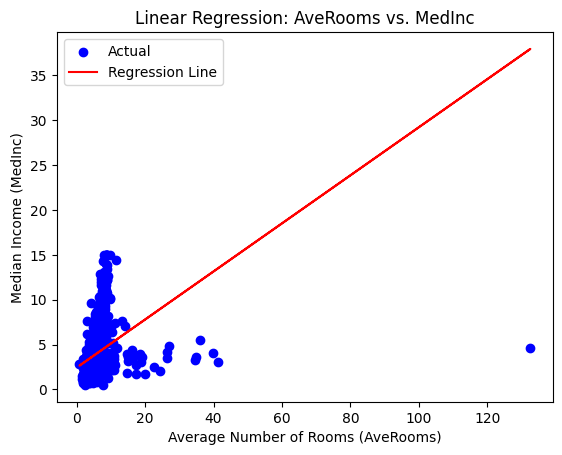

In [36]:
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Average Number of Rooms (AveRooms)')
plt.ylabel('Median Income (MedInc)')
plt.title('Linear Regression: AveRooms vs. MedInc')
plt.legend()
plt.show()